> This notebook follows the [fastai style guidelines](https://docs.fast.ai/dev/style.html#style-guide).

In [16]:
#| default_exp app

## Setup

In [17]:
#| export
from fastai.vision.all import *
import gradio as gr

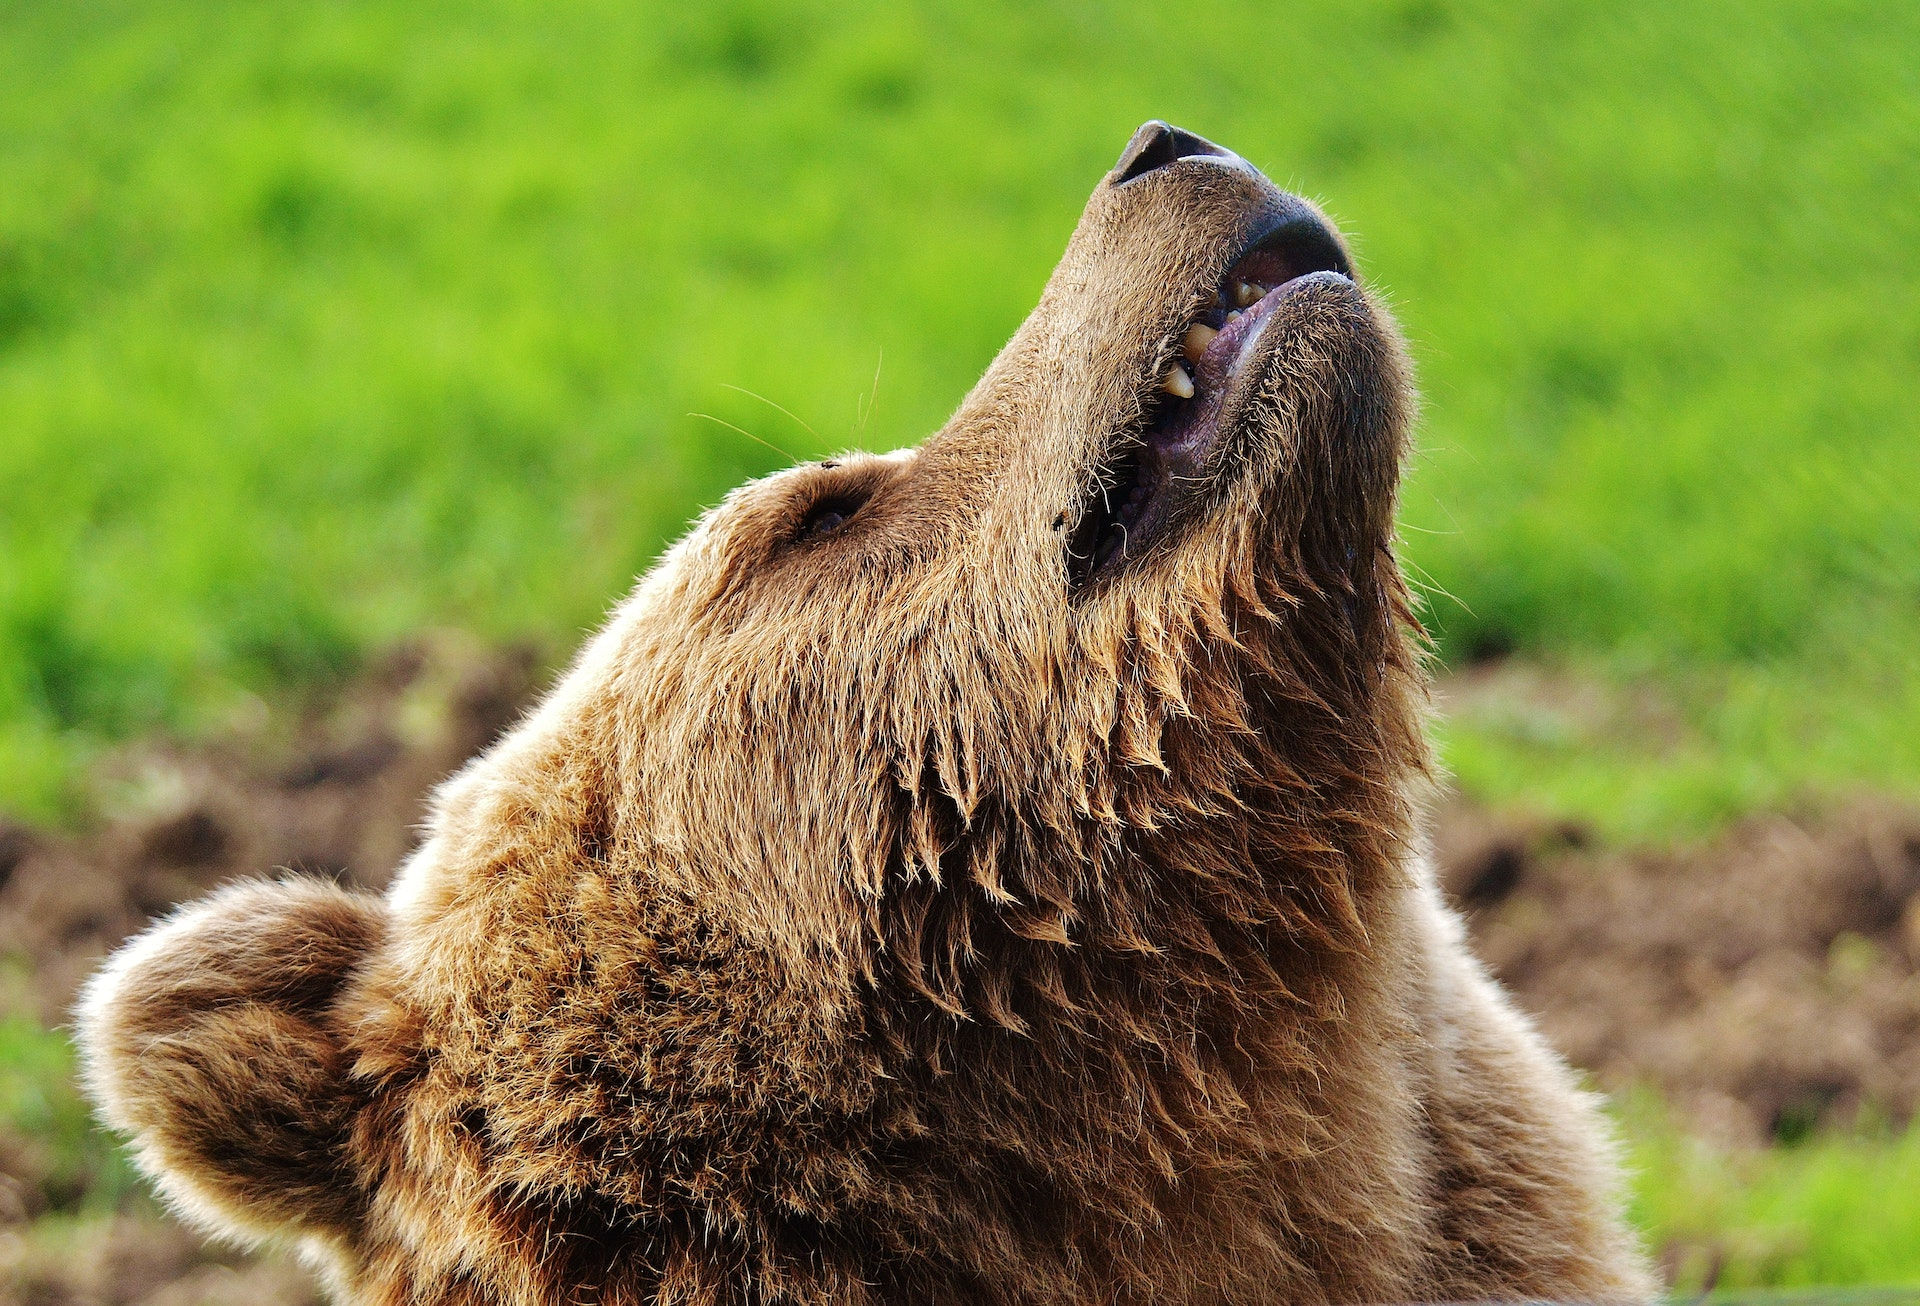

In [18]:
test_img = PILImage.create('example_images/grizzly_1.jpg'); test_img

## Create Learner

In [19]:
#| export
learner = load_learner('model/export.pkl')

In [20]:
learner.predict(test_img)

('grizzly', TensorBase(1), TensorBase([4.7889e-06, 9.9998e-01, 1.0577e-05]))

## Classification Function

In [21]:
#| export

cats = ('Grizzly Bear', 'Black Bear', 'Teddy Bear',)

def classify_img(img):
    preds, idx, probs = learner.predict(img)
    return dict(zip(cats, map(float, probs)))

In [22]:
classify_img(test_img)

{'Grizzly Bear': 4.78894253319595e-06,
 'Black Bear': 0.999984622001648,
 'Teddy Bear': 1.0576571185083594e-05}

## Interface Attributes

In [23]:
#| export

img = gr.Image()
lbl = gr.Label()
examples = [str(img_path) for img_path in Path('example_images/').rglob('*.jpg')]

title = 'Bear Classifier'
description = 'My first AI model that can tell you whether an image contains a grizzly bear, a black bear, or a teddy bear. This model was trained on the ' \
              'ResNet18 architecture and used the fastai library.'
article = "<p style='text-align: center; font-size: 36px'><a href='https://forbo7.github.io/forblog/posts/2_bear_classifier_model.html' " \
          "targets='_blank'><Blog Post</a></p>"

In [24]:
examples

['example_images/black_1.jpg',
 'example_images/grizzly_1.jpg',
 'example_images/grizzly_2.jpg',
 'example_images/teddy_1.jpg',
 'example_images/teddy_2.jpg']

## Create Interface

In [25]:
#| export
interface = gr.Interface(
    fn=classify_img,
    inputs='image',
    outputs='label',
    examples=examples,
    title=title,
    description=description,
    article=article
)

interface.launch(inline=False, enable_queue=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x28ecc4700>, 'http://127.0.0.1:7860/', None)

## Export

In [26]:
from nbdev.export import nb_export

In [27]:
nb_export('app.ipynb', '.')